# Accredit

Reference to Readme


# Problem Rephrase 
This is a nearly identical object re-identification problem. 

From the use case, we need idetify if a bottle has been seen or not. If has been seen, must identify which category it belongs to. If not being seen this is a new category.  The chanlleges are:
1. to tell if the bottle has been seen or not (Similiarity Search). 
2. to find the right category if has been seen. (Classification)
3. To find a way that can distinguish if a bottle is a new or not(Identification). 

# Solution Workflow and Architecture

## Workflow
![workflow](./images/workflow.png)

## Solution Architecture
![architecture](./images/architecture.png )


# System Result

## Alexnet - Pretrained

In [1]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "alexnet"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox_nobg", model_name=model_name)


{"code":200,"msg":"success","data":{"id":1,"name":"bottle"}}
256
{"code":565,"msg":"space_notexists"}


INFO 2021-12-14 20:17:33,110 load_bottles 884824 139635881113408 load_data_to_vearch(./data/zerobox_nobg,alexnet)


b'{"code":200,"msg":"success","data":{"id":1,"name":"alexnet","version":2,"db_id":1,"enabled":true,"partitions":[{"id":1,"space_id":1,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":2,"space_id":1,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":3,"space_id":1,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":4,"space_id":1,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 256, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "nsubvector": 

In [10]:
from util.testutil import TestUtil
from pprint import pprint
import numpy as np

# batch test results
testutil = TestUtil(model_name="alexnet",data_path="./data/zerobox_nobg")
(accuracy, cmatrix,wrong_results) = testutil.test()


# np.savetxt("./alexnet_cmatrix.csv",cmatrix.astype("int"),delimiter=',',fmt="%d")

cmatrix.to_csv("./alexnet_cmatrix.csv")

pprint(f"Final accuracy: {accuracy}")
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)


INFO 2021-12-14 20:22:02,755 testutil 884824 139635881113408 TestUtil test alexnet


'Final accuracy: 0.84'
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           1.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              0.0         0.0      1.0           0.0       0.0   
blackbottles         0.0         0.0      0.0           4.0       0.0   
blackcup             0.0         0.0      0.0           0.0       1.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0         0.0      0.0           0.0       0.0   
red02                0.0         0.0      0.0           0.0       0.0   
silver               0.0         0.0      0.0           0.0       0.0   
white                0.0    

## VGG16 (PreTrained)

In [5]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "vgg16"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox_nobg", model_name=model_name)

{"code":550,"msg":"dbname bottle is exists"}
512
{"code":200,"msg":"success"}


INFO 2021-12-14 20:18:51,641 load_bottles 884824 139635881113408 load_data_to_vearch(./data/zerobox_nobg,vgg16)


b'{"code":200,"msg":"success","data":{"id":3,"name":"vgg16","version":2,"db_id":1,"enabled":true,"partitions":[{"id":9,"space_id":3,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":10,"space_id":3,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":11,"space_id":3,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":12,"space_id":3,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 512, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "nsubvector":

In [11]:
# batch test results
from util.testutil import TestUtil
from pprint import pprint

testutil = TestUtil(model_name="vgg16",data_path="./data/zerobox_nobg")
(accuracy, cmatrix,wrong_results) = testutil.test()

cmatrix.to_csv("./vgg16_cmatrix.csv")
pprint(f"Final accuracy: {accuracy}")
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)


INFO 2021-12-14 20:22:15,331 testutil 884824 139635881113408 TestUtil test vgg16


'Final accuracy: 0.88'
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           1.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              0.0         0.0      2.0           0.0       0.0   
blackbottles         0.0         0.0      0.0           4.0       0.0   
blackcup             0.0         0.0      0.0           0.0       1.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0         0.0      0.0           0.0       0.0   
red02                0.0         0.0      0.0           0.0       0.0   
silver               0.0         0.0      0.0           0.0       0.0   
white                0.0    

## AlphaAlexNet (Out New Model)

In [ ]:
from util.trainingutil import AlphaAlexNet
import torchsummary

model = AlphaAlexNet()
# x = np.random.randn(64,3,224,224)
# pprint(x)
# torchsummary.summary(model,input_size=(64,3,224,224))
print(model)

AlphaAlexNet(
  (conv1): Conv2d(9, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=10, bias=True)
)


In [7]:
from util.load_bottles import load_data_to_vearch
from init_vearch_local import create_space,delete_space,create_db
from util.vearchutil import VearchUtil

db_name="bottle"
create_db(db_name)

model_name = "alphaalex"
image_name = "./data/zerobox/images/blackbottles/00001.png"
util = VearchUtil(model_name=model_name)
item = util.extract_feature(image=image_name)
feature_dim = len(item)
print(feature_dim)

delete_space("bottle",model_name)
create_space("bottle",model_name,feature_dim=feature_dim,partition=4)
load_data_to_vearch(data_path="./data/zerobox_nobg", model_name=model_name)


{"code":550,"msg":"dbname bottle is exists"}
256
{"code":565,"msg":"space_notexists"}


INFO 2021-12-14 20:19:25,164 load_bottles 884824 139635881113408 load_data_to_vearch(./data/zerobox_nobg,alphaalex)


b'{"code":200,"msg":"success","data":{"id":4,"name":"alphaalex","version":2,"db_id":1,"enabled":true,"partitions":[{"id":13,"space_id":4,"db_id":1,"partition_slot":0,"replicas":[1]},{"id":14,"space_id":4,"db_id":1,"partition_slot":1073741823,"replicas":[1]},{"id":15,"space_id":4,"db_id":1,"partition_slot":2147483646,"replicas":[1]},{"id":16,"space_id":4,"db_id":1,"partition_slot":3221225469,"replicas":[1]}],"partition_num":4,"replica_num":1,"properties":{"image_name": {"type": "keyword", "index": true}, "image": {"type": "vector", "dimension": 256, "format": "normalization"}, "model_name": {"type": "keyword", "index": true}, "keyword": {"type": "keyword", "index": true}, "tags": {"type": "string", "array": true, "index": true}, "uuid": {"type": "keyword", "index": true}, "sid": {"type": "keyword", "index": true}},"engine":{"name":"gamma","index_size":70000,"metric_type":"InnerProduct","retrieval_type":"IVFPQ","retrieval_param":{"metric_type": "InnerProduct", "ncentroids": 256, "nsubvec

In [12]:
# batch test results
from util.testutil import TestUtil
from pprint import pprint

testutil = TestUtil(model_name="alphaalex",data_path="./data/zerobox_nobg")
(accuracy, cmatrix,wrong_results) = testutil.test()


cmatrix.to_csv("./alphaalex_cmatrix.csv")
pprint(f"Final accuracy: {accuracy}")
pprint(cmatrix)
print("Wrong results:")
pprint(wrong_results)

INFO 2021-12-14 20:22:28,429 testutil 884824 139635881113408 TestUtil test alphaalex


'Final accuracy: 0.88'
              babyblue01  babyblue02  beige01  blackbottles  blackcup  \
babyblue01           1.0         0.0      0.0           0.0       0.0   
babyblue02           0.0         1.0      0.0           0.0       0.0   
beige01              0.0         0.0      2.0           0.0       0.0   
blackbottles         0.0         0.0      0.0           4.0       0.0   
blackcup             0.0         0.0      0.0           0.0       1.0   
blacktumbler         0.0         0.0      0.0           0.0       0.0   
blue                 0.0         0.0      0.0           0.0       0.0   
lavender01           0.0         0.0      0.0           0.0       0.0   
notfound             0.0         0.0      0.0           0.0       0.0   
red01                0.0         0.0      0.0           0.0       0.0   
red02                0.0         0.0      0.0           0.0       0.0   
silver               0.0         0.0      0.0           0.0       0.0   
white                0.0    

# Demo Search results


## correct result

[10, 0, 16, 11]


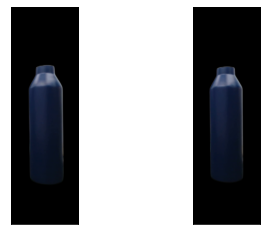

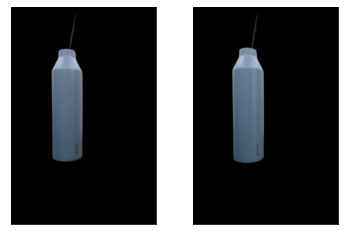

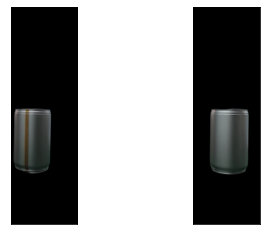

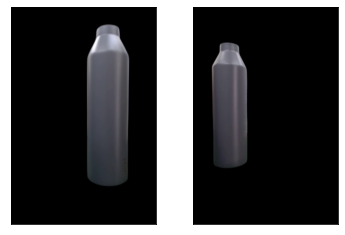

In [15]:
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2
import json

data_path = "./data/zerobox_nobg"
data = json.load(open(f"{data_path}/meta_test.json"))
data = np.array(data)
# print(len(data))

# subset = np.random.randint(0,len(data),4)
subset=[10,0,16,11]
pprint(subset)

for d in data[subset]:
    util = VearchUtil(model_name="alphaalex")
    # image_name="./data/zerobox/images/blue/00007.png"
    image_name = f'{data_path}/images/{d["class"]}/{d["file_name"]}'
    item = util.search_by_image(image=image_name)
    

    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image2 = cv2.imread(item["data"]["image_name"])
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

    TestUtil.plot_images([image,image2])

# to view all images
# https://drive.google.com/drive/folders/1-qIJfJl9Xhw0eMKnIIAlLGbsB2zfz8Gc


## Wrong result

{'data': {'image_name': './data/zerobox/images/beige01/output0009.png',
          'keyword': '',
          'model_name': 'alexnet',
          'sid': 'beige01',
          'tags': ['beige01'],
          'uuid': 'b1b83289-1b85-4dec-8c9f-2c48b0a31ed7'},
 'score': 0.9507838487625122,
 'vearch_id': 'b1b83289-1b85-4dec-8c9f-2c48b0a31ed7'}


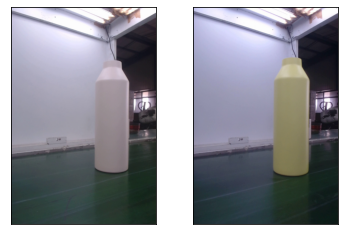

In [16]:
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2

wrong_images = ['./data/zerobox_nobg/images/blacktumbler/00009.png',
 './data/zerobox_nobg/images/white01/bumbler0011.png',
 './data/zerobox_nobg/images/white03/output0065.png']

util = VearchUtil(model_name="alexnet")
image_name="./data/zerobox/images/white02/output0064.png"
item = util.search_by_image(image=image_name)
pprint(item)

image = cv2.imread(image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image2 = cv2.imread(item["data"]["image_name"])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

TestUtil.plot_images([image,image2])

label: blacktumbler found: silver score: 0.8909323215484619
label: blacktumbler found: silver score: 0.8909323215484619
label: white01 found: babyblue02 score: 0.9501044750213623
label: white01 found: babyblue02 score: 0.9501044750213623
label: white03 found: white02 score: 0.9513218402862549
label: white03 found: white02 score: 0.9513218402862549


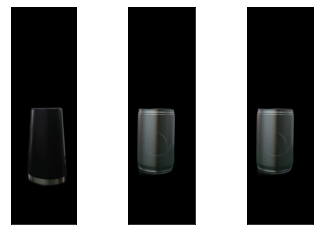

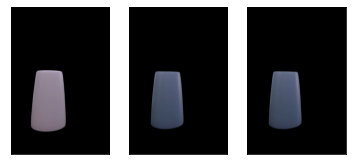

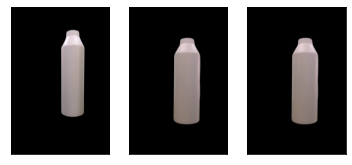

In [ ]:
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
import cv2

wrong_images = ['./data/zerobox_nobg/images/blacktumbler/00009.png',
 './data/zerobox_nobg/images/white01/bumbler0011.png',
 './data/zerobox_nobg/images/white03/output0065.png']

for image_name in wrong_images:
    util = VearchUtil(model_name="alphaalex")
    # image_name=wrong_images[0]
    items = util.search_by_image(image=image_name,return_records=2)
    # pprint(item)
    label = image_name.split('/')[-2]

    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    images = [image]
    for item in items:
        target = item["data"]["tags"][0]
        print(f"label: {label} found: {target} score: {item['score']}")
       
        image2 = cv2.imread(item["data"]["image_name"])
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
        images.append(image2)

    TestUtil.plot_images(images)


# Bottle Idnetification

## Siamese_alexnet
![Siamese model](./images/Siamese.png)

## DDSNet(DifferDifferButSame) (Proposed solution)

## Custom trained Alexnet 
Implemented, for the client, it requires more data to train.
[Notebook](https://github.com/MM2021-811/ImageIdentification/blob/chenggui/Alexnet_4bottle.ipynb)

## Custom trained DifferNet (Proposed solution)

# Other work

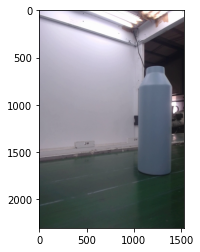

(2304, 1536, 3)
(6, 255, 127.39885090015552)


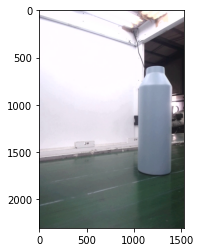

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
 
image_name = './data/zerobox_light/images/babyblue01/output0079.png'
image = cv2.imread(image_name)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

image2 = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
pprint(image.shape)

min = np.min(image2[:,:,0])
max = np.max(image2[:,:,0])
mean = np.mean(image2[:,:,0])
pprint((min,max,mean))
image2 = image2.astype("float32")

image2[:,:,0] *= (180.0/mean)
image2[image2[:,:,0] > 255,0 ] = 255 

image2 = image2.astype("uint8")
image3 = cv2.cvtColor(image2,cv2.COLOR_Lab2RGB)

plt.imshow(image3)
plt.show()
plt.imsave("color_corrected.png",image3)
 

## Color adjustment

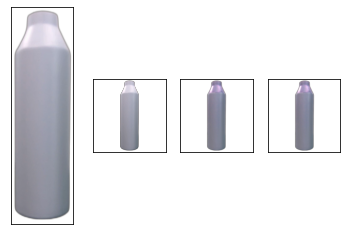

In [ ]:
import cv2
from util.vearchutil import VearchUtil
from util.testutil import TestUtil
from pprint import pprint
from util.trainingutil import AlphaBgTransform
import matplotlib.pyplot as plt

wrong_images = ['./data/zerobox_nobg/images/blackbottles/000037.png',
 './data/zerobox_nobg/images/white02/output0064.png',
 './data/zerobox_nobg/images/white02/output0065.png',
 './data/zerobox_nobg/images/white03/output0065.png',
 './data/zerobox_nobg/images/yellow03/bumbler0021.png',
 './data/zerobox_nobg/images/yellow03/bumbler0022.png']

model_name = "vgg16"
# image_name = wrong_images[3]
image_name = "./data/zerobox_nobg/images/white03/output0065.png"
image = cv2.imread(image_name,cv2.IMREAD_UNCHANGED)

t1 = AlphaBgTransform.center_crop(image)

# plt.imshow(t1)
# plt.show()

t2 = AlphaBgTransform.to_square(t1)
t3 = AlphaBgTransform.resize(t2,224)
t4 = AlphaBgTransform.enhance_color(t3)

TestUtil.plot_images([t1,t2,t3,t4])

# Result and Discussion

## Result
The Image feature extraion module using AlphaAlexNet. The the feature(vector) is then sent to Vearch(Image Search) for querying. The Vearch will return top N result. We chsooe the top one record for next step. For this step Image Search provide 84% - 88% accuracy. The last step is using custom trained model(AlexNet) to test query image against the returned result to improve accuracy. 

## Discussion

### Original Design
The original design, the third module is using SiameseAlexNet to test query image and the top 1 return from Vearch. The output will tell the if the the query image is the same category as the top 1 result. If it is, the returned image category is the result. If the result is negative, the query image is a new category. The SiameseAlexNet training accuracy is 100% but the actual testing result is not good. The possible reason might because the training dataset is too small. In the future, if there is more data, this SiameseAlexNet might work.

### Propose other options and future work
From our research, the Differnet gives a good result to tell if two images are same or not. We can train a DifferNet for the third step final decision.

Another proposed option is build a model bank(feature distance based), and using this model for the decsion. By using this option Vearch is no logner required.

The third option is develop a statistical distance based decision making algorithm(DDSNet). The model structure is similiar with DifferNet but the decision making algrithm is different from DifferNet.




